---

## **<font color="Dodgerblue"> Modelación Climática Tropical</font>**
### **<font color="crimson"> Ciclo anual GPCC</font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy import stats

In [6]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

In [7]:
# Archivo de precipitación GPCC
filename='/home/jovyan/ModClim/datos_actualizados/precip.comb.v2020to2019-v2020monitorafter.total.nc'
ds=xr.open_dataset(filename)
pr=ds['precip']
pr

<xarray.DataArray 'precip' (time: 1610, lat: 180, lon: 360)> Size: 417MB
[104328000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 13kB 1891-01-01 1891-02-01 ... 2025-02-01
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes:
    long_name:     GPCC Monthly total of precipitation
    statistic:     Total
    valid_range:   [   0. 8000.]
    parent_stat:   Observations
    var_desc:      Precipitation
    units:         mm
    level:         Surface
    dataset:       GPCC Precipitation 1.0degree V2020 Full Reanalysis
    actual_range:  [   0.   4830.39]

In [8]:
pr=pr/30.5
pr['units']='mm day-1'

In [9]:
pr.units

<xarray.DataArray 'units' ()> Size: 32B
array('mm day-1', dtype='<U8')
Coordinates:
    units    <U8 32B 'mm day-1'

In [10]:
pr_years = pr.sel(time=slice('1982', '2024'))

In [11]:
jjas = pr_years.where((pr_years.time.dt.month >= 6) & (pr_years.time.dt.month <= 9), drop=True)

In [12]:
mean_jjas = jjas.mean('time')

In [13]:
mean_jjas

<xarray.DataArray 'precip' (lat: 180, lon: 360)> Size: 259kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    units    <U8 32B 'mm day-1'

In [14]:
print(mean_jjas.min())
print(mean_jjas.max())

<xarray.DataArray 'precip' ()> Size: 4B
array(1.1437285e-05, dtype=float32)
Coordinates:
    units    <U8 32B 'mm day-1'
<xarray.DataArray 'precip' ()> Size: 4B
array(37.69598, dtype=float32)
Coordinates:
    units    <U8 32B 'mm day-1'


### **<font color="Steelblue"> Ciclo anual del centro-sur de México.</font>** 

In [15]:
pr_years=pr_years.where(pr_years<1e10,drop=True)

In [16]:
# Asignamos pesos con la función coseno
lats = pr_years.lat
weights = np.cos(np.deg2rad(lats))
weights.name = "weights"

In [17]:
# Aplicamos weights y luego el promedio 
pr_weighted = pr_years.weighted(weights)
pr_meanglobal = pr_weighted.mean(dim=['lat', 'lon'])

In [18]:
# 1982-2021
centrolat=pr_years.sel(lat=slice(23.75,13.75))
centrolon=centrolat.sel(lon=slice(253.75,273.5))

centro_peso=centrolon.weighted(weights)
prcentro=centrolon.mean(["lon","lat"])

mensual_prcentro = prcentro.groupby(prcentro.time.dt.month).mean()
#mensual_prcentro.to_netcdf('GPCC_ciclo_actualizado.nc')
pr_years.lon

<xarray.DataArray 'lon' (lon: 360)> Size: 1kB
array([  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5], dtype=float32)
Coordinates:
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    units    <U8 32B 'mm day-1'
Attributes:
    long_name:           Longitude
    units:               degrees_east
    standard_name:       longitude
    actual_range:        [  0.5 359.5]
    axis:                X
    coordinate_defines:  point

In [19]:
meses=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

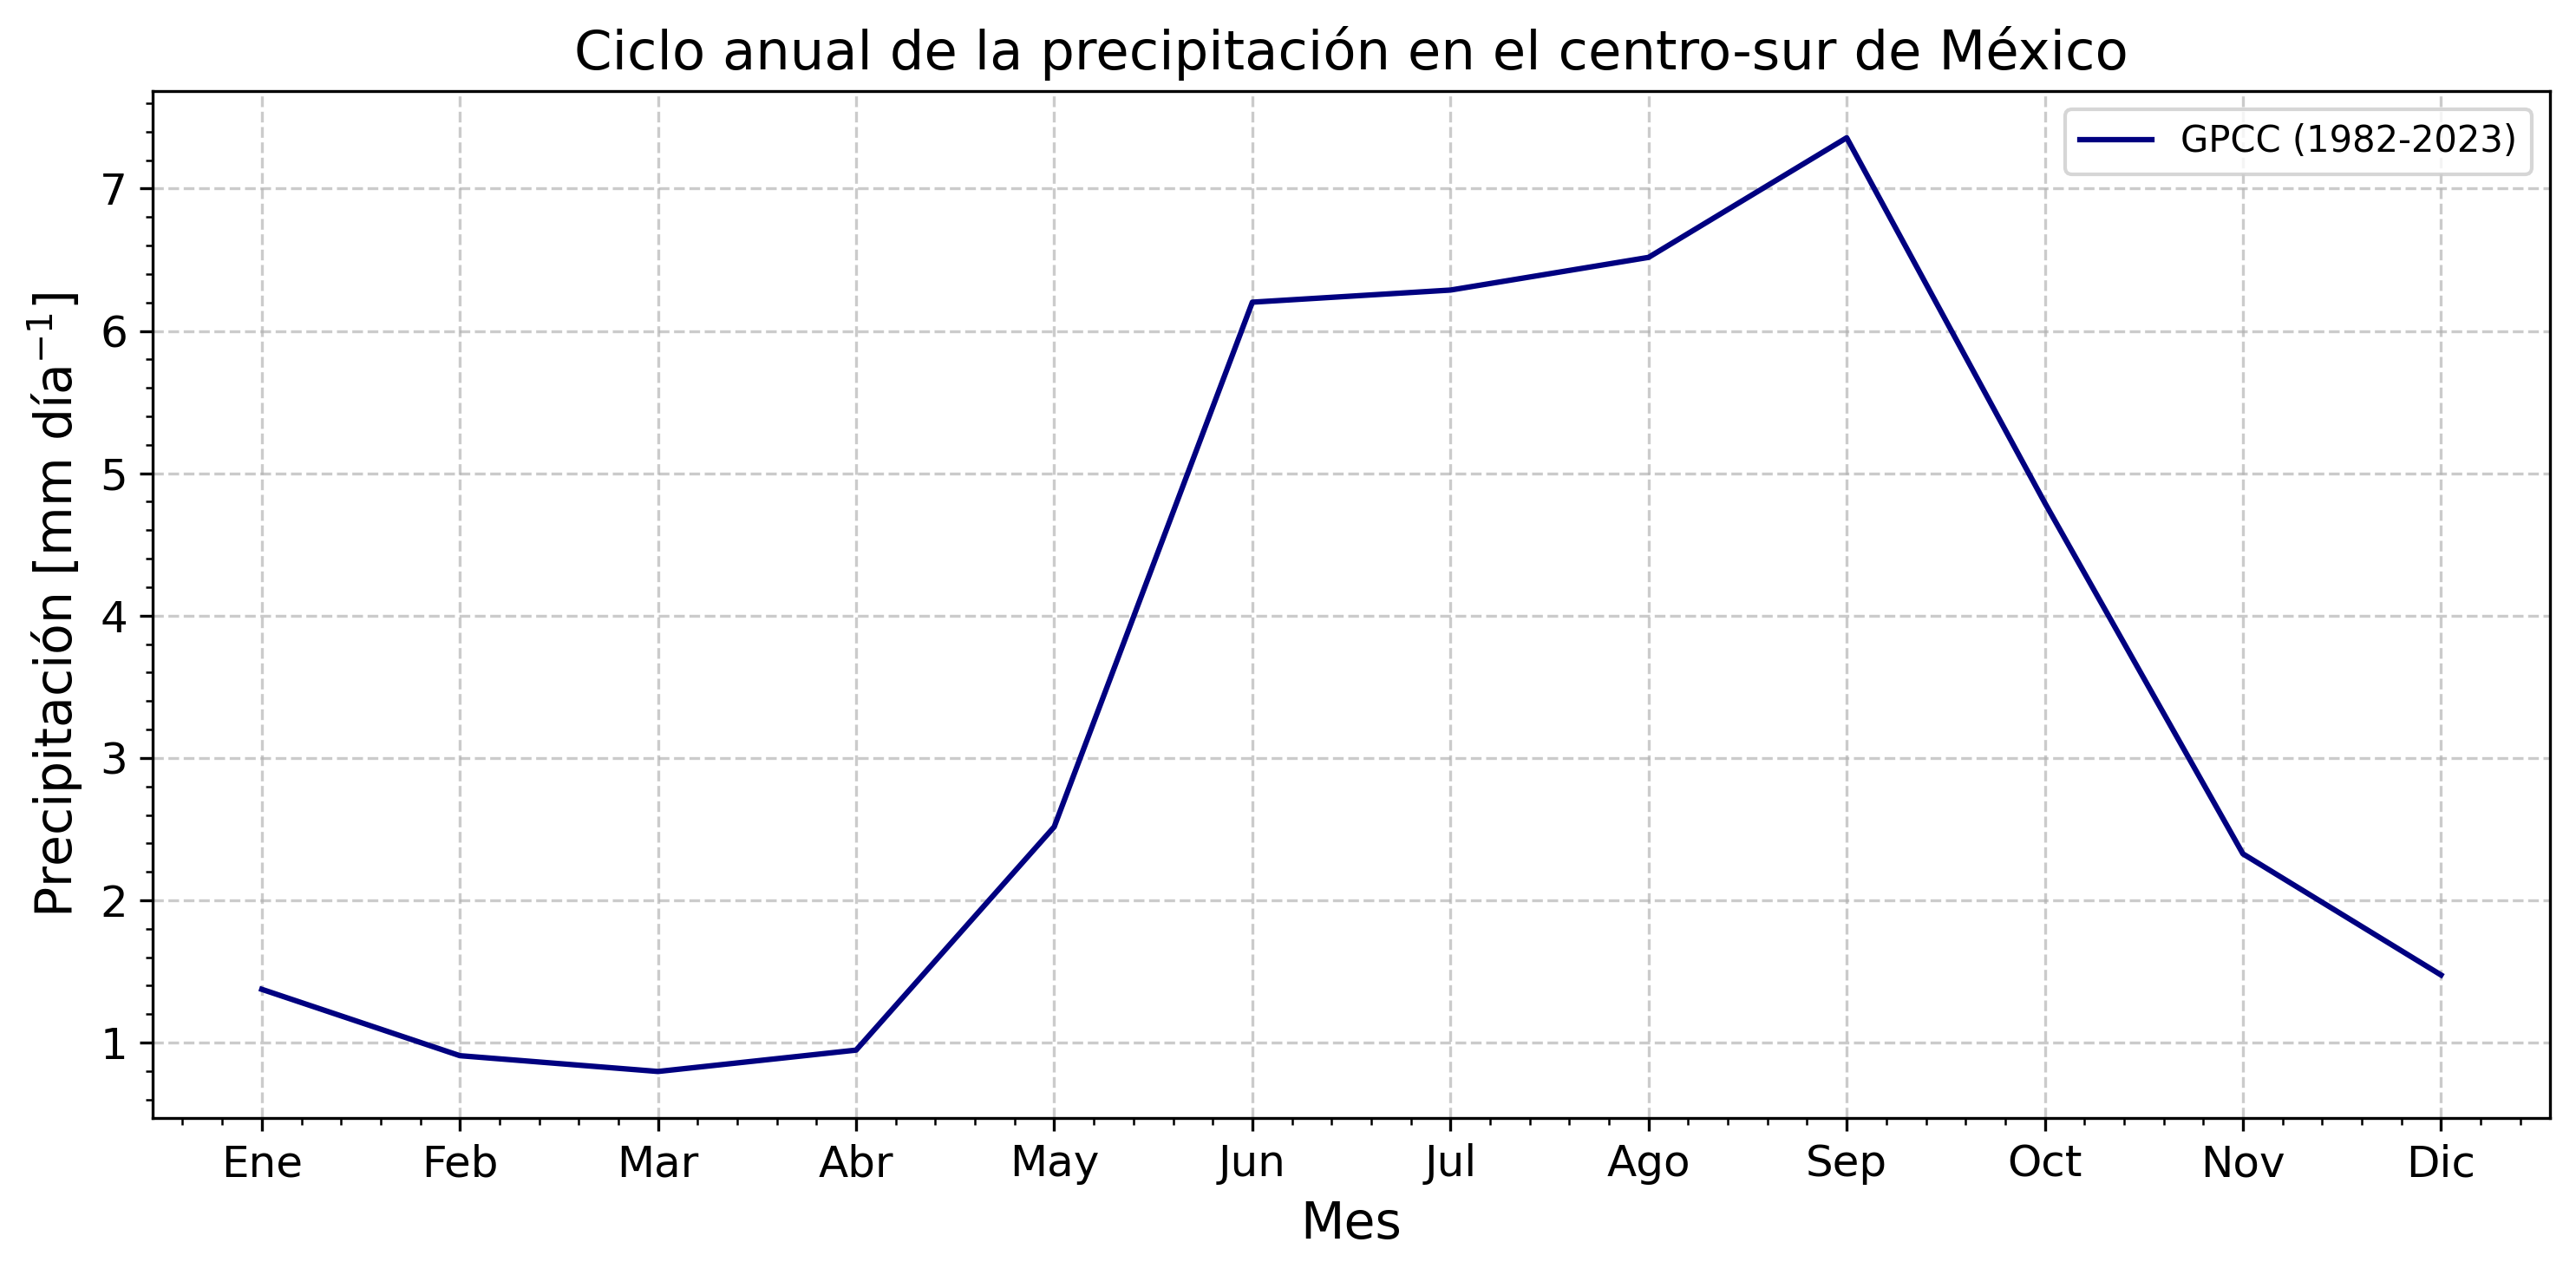

In [20]:
plt.figure(figsize=(10,5), dpi=300)
plt.plot(meses,mensual_prcentro,c='navy',label='GPCC (1982-2023)') 
lineplot_setup(None,None,'Mes','Precipitación [mm día$^{-1}$]',title='Ciclo anual de la precipitación en el centro-sur de México')
plt.legend()
plt.tight_layout()